##Importing neccesary Libraries

In [75]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from  sklearn.model_selection import train_test_split
from  sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


In [55]:
df = pd.read_csv("/content/customer.csv")
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [45]:
df.shape

(50, 5)

In [7]:
df.head(10)

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No
5,31,Female,Average,School,Yes
6,18,Male,Good,School,No
7,60,Female,Poor,School,Yes
8,65,Female,Average,UG,No
9,74,Male,Good,UG,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        50 non-null     int64 
 1   gender     50 non-null     object
 2   review     50 non-null     object
 3   education  50 non-null     object
 4   purchased  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [11]:
df.describe()

,age
count,50.000000
mean,54.160000
std,25.658161
min,15.000000
25%,30.250000
50%,57.000000
75%,74.000000
max,98.000000


In [13]:
df.isnull().sum()

age          0
gender       0
review       0
education    0
purchased    0
dtype: int64

In [46]:
df.describe(include ='object')

,gender,review,education,purchased
count,50,50,50,50
unique,2,3,3,2
top,Female,Poor,PG,No
freq,29,18,18,26


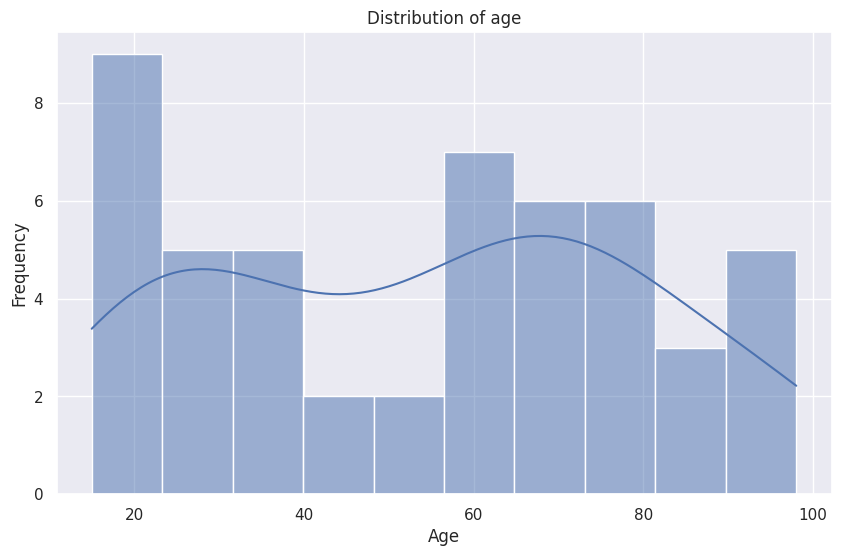

In [47]:
sns.set(style="darkgrid")

plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [56]:
X = df.drop("purchased", axis=1)
y = df['purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [57]:
shape1 = X_train.shape
shape2 = X_test.shape
print(shape1)
print(shape2)

(40, 4)
(10, 4)


In [58]:
X_train.head(3)

,age,gender,review,education
12,51,Male,Poor,School
4,16,Female,Average,UG
37,94,Male,Average,PG


In [59]:
X_train = pd.get_dummies(X_train, columns=['gender'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['gender'], drop_first=True)

In [60]:
X_train

,age,review,education,gender_Male
12,51,Poor,School,True
4,16,Average,UG,False
37,94,Average,PG,True
8,65,Average,UG,False
3,72,Good,PG,False
6,18,Good,School,True
41,23,Good,PG,True
46,64,Poor,PG,False
47,38,Good,PG,False
15,75,Poor,UG,True


In [64]:
review_catagories = ['Poor', 'Average', 'Good']
education_cat = ['School', 'UG', 'PG']
ordinal_enc = OrdinalEncoder(categories=[review_catagories, education_cat])

In [65]:
X_train[['review', 'education']] = ordinal_enc.fit_transform(X_train[['review', 'education']])
X_test[['review', 'education']] = ordinal_enc.transform(X_test[['review', 'education']])

In [66]:
X_train.head(5)

,age,review,education,gender_Male
12,51,0.0,0.0,True
4,16,1.0,1.0,False
37,94,1.0,2.0,True
8,65,1.0,1.0,False
3,72,2.0,2.0,False


In [67]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [69]:
y_train

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.23837621143918084
R-squared: 0.04649515424327666


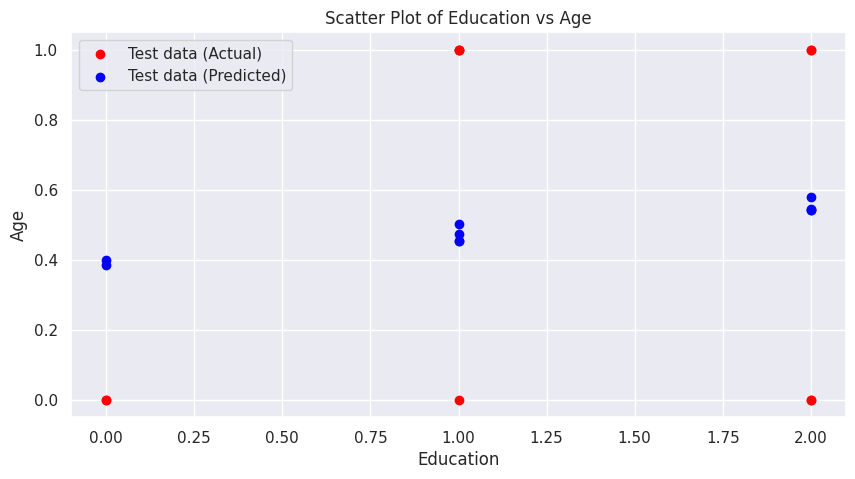

In [77]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['education'], y_test, color='red', label='Test data (Actual)')
plt.scatter(X_test['education'], y_pred, color='blue', label='Test data (Predicted)')
plt.xlabel('Education')
plt.ylabel('Age')
plt.title(f'Scatter Plot of Education vs Age')
plt.legend()
plt.show()